# **SARS-CoV-2 Infection Classification with Complete Blood Count (CBC) parameters & Respiratory Viruses**



The pandemic of Coronavirus disease 2019 (COVID-19) represents a scientific and social crisis. One of the most pressing unmet needs for coronavirus disease in 2019 is its unpredictable clinical course, which can result in an irreversible outcome. Study after study lends support to the claim that haematological parameters such as platelets, white blood cell count, lymphocytes, etc. have all been associated to COVID-19 infection. Inspired, in this study, we are going to explore the association between Coronavirus Disease 19 (COVID-19) and the primary complete blood count(CBC) parameters, as well as the association between Coronavirus Disease 19 (COVID-19) and respiratory viruses detected in patients.

The **purpose** of this notebook is to:
*  use a **logistic regression model** to investigate and predict the relationship between **Coronavirus disease 2019 (COVID-19)** and the **primary complete blood count (CBC) parameters**, as well as the relationship between Coronavirus disease 2019 (COVID-19) and **respiratory viruses** in the sample data set.
(Our target is to achieve at least 70% of F1 score and 80% accuracy score.)





**Parameters and Variables**

**Complete Blood Count(CBC)**: “Hematocrit", "Hemoglobin", "Platelets", "Mean platelet volume ", "Red blood Cells", "Lymphocytes", "Mean corpuscular hemoglobin concentration (MCHC)", "Leukocytes", "Basophils", "Mean corpuscular hemoglobin (MCH)", "Eosinophils", "Mean corpuscular volume (MCV)", "Monocytes", "Red blood cell distribution width (RDW)", "Serum Glucose", "Neutrophils", "Urea", "Proteina Creativa mg/dL", "Creatinine", "Potassium" and "Sodium"

**Respiratory viruses**: "Respiratory Syncytial Virus", "Influenza A", "Influenza B", "Parainfluenza 1", "CoronavirusNL63", "Rhinovirus/Enterovirus", "Coronavirus HKU1", "Parainfluenza 3", "Chlamydophila pneumoniae", "Adenovirus", "Parainfluenza 4", "Coronavirus229E", "CoronavirusOC43", "Inf A H1N1 2009", "Bordetella pertussis", "Metapneumovirus" and "Parainfluenza 2"


**Process Flow Diagram:**

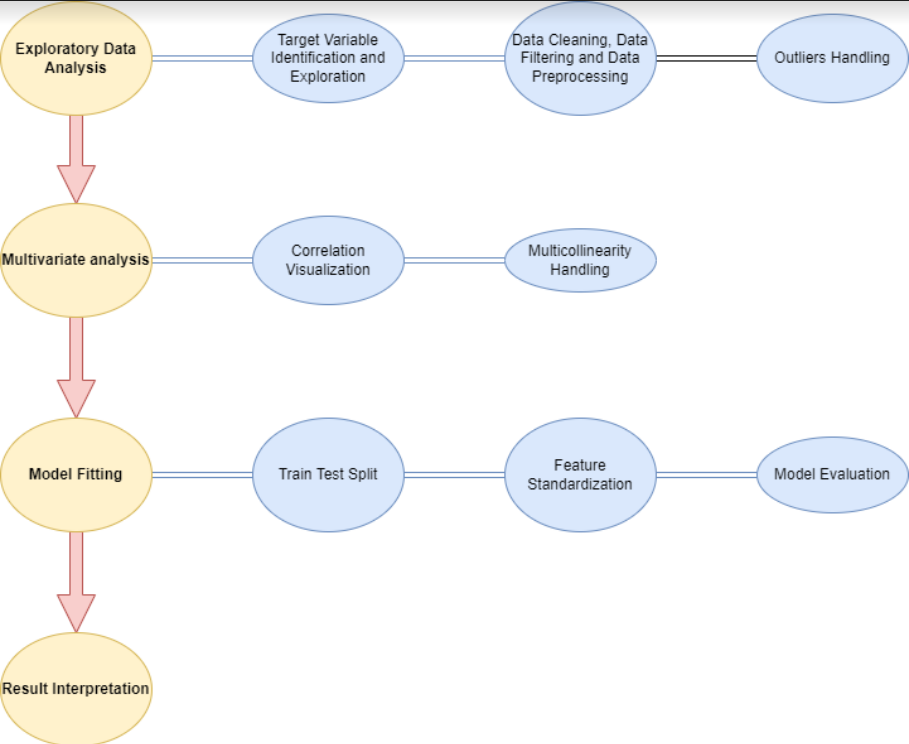

**Data Source**: https://www.kaggle.com/datasets/einsteindata4u/covid19

# **Libraries and File I/O**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns
from google.colab import files
import scipy.stats as stats
import matplotlib
from sklearn.preprocessing import LabelEncoder
from math import exp


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

In [ ]:
ds = pd.read_excel('dataset.xlsx')

# **Exploratory Data Analysis and Data Preparation**

### **Preview**

Let's have some preview on the dataset.

In [ ]:
ds.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here is the summary of the dataset.

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


Here is the statistical properties of the dataset.

In [ ]:
ds.describe()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,5644.000000,5644.000000,5644.000000,5644.000000,6.030000e+02,6.030000e+02,6.020000e+02,5.990000e+02,6.020000e+02,6.020000e+02,...,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.000000e+01,2.000000e+01,2.700000e+01
mean,9.318391,0.013997,0.008859,0.007264,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,8.424447e-09,-7.866736e-09,...,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09
std,5.777903,0.117489,0.093713,0.084929,1.000830e+00,1.000830e+00,1.000832e+00,1.000836e+00,1.000832e+00,1.000832e+00,...,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.025978e+00,1.025978e+00,1.019049e+00
min,0.000000,0.000000,0.000000,0.000000,-4.501420e+00,-4.345603e+00,-2.552426e+00,-2.457575e+00,-3.970608e+00,-1.865070e+00,...,-1.999560e+00,-1.244817e+00,-3.082674e+00,-3.568877e+00,-2.925618e+00,-2.985592e+00,-1.175907e+00,-1.532932e+00,-1.480526e+00,-2.900254e+00
25%,4.000000,0.000000,0.000000,0.000000,-5.188074e-01,-5.862439e-01,-6.053457e-01,-6.624832e-01,-5.679496e-01,-7.307069e-01,...,-1.122574e+00,-5.348102e-01,-3.308668e-01,-9.210583e-02,-5.117720e-01,-5.397211e-01,-8.169898e-01,-1.214975e-01,-5.527296e-01,-4.852787e-01
50%,9.000000,0.000000,0.000000,0.000000,5.340703e-02,4.031596e-02,-1.217160e-01,-1.015171e-01,1.385207e-02,-1.426696e-02,...,2.677689e-01,-2.120799e-01,-1.181667e-02,2.942021e-01,7.743482e-02,5.633191e-02,-1.599549e-01,-1.174366e-02,-1.381825e-01,1.826928e-01
75%,14.000000,0.000000,0.000000,0.000000,7.171751e-01,7.295320e-01,5.314981e-01,6.838353e-01,6.661759e-01,5.976919e-01,...,7.383496e-01,2.305214e-02,6.661649e-01,5.115003e-01,4.385609e-01,5.085100e-01,4.500090e-01,-1.174366e-02,2.763648e-01,5.937525e-01
max,19.000000,1.000000,1.000000,1.000000,2.662704e+00,2.671868e+00,9.532034e+00,3.713052e+00,3.645706e+00,3.764100e+00,...,1.337265e+00,3.236524e+00,1.703078e+00,1.042674e+00,1.940087e+00,2.029471e+00,2.205371e+00,2.841856e+00,2.862350e+00,1.826932e+00


### **Target Variable: SARS-Cov-2 exam result**

**Now, we set "SARS-Cov-2 exam result" as our target variable.**
The first thing we have to do is to make sure there is no missing values in the target variables, this can be done by dropna() function.

In [ ]:
ds = ds.dropna(subset= ['SARS-Cov-2 exam result'])

Notice the data is in string data type, we have to encode them.

In [ ]:
ds.replace(('positive', 'negative'), (1, 0), inplace=True)

Now, we can clearly see that the data is only having 2 unique values and there are no missing values for the column.

In [ ]:
ds["SARS-Cov-2 exam result"].nunique()


2

Final review of the target variable.

0    0.901134
1    0.098866
Name: SARS-Cov-2 exam result, dtype: float64


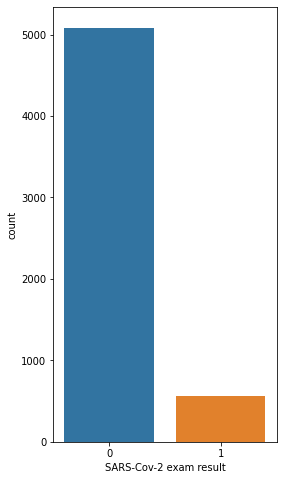

In [ ]:
print(ds["SARS-Cov-2 exam result"].value_counts()/len(ds))

f, ax = plt.subplots(figsize=(4, 8))
ax = sns.countplot(x="SARS-Cov-2 exam result", data=ds)
plt.show()

Positive cases take up appears 90.11% and negative cases take up 9.89%.


The dataset has two types of categorical and numerical variables. The categorical variables that are to be used in this analysis are mainly the
**test results of other viruses** and we can investigate the relationship these variables with our target variable. On the other hand, the numerical variables that are used are the **cells ratio** of the patients and we are going to use these variables to check the correlation with out target variable. The first step that we should do is to handle the missing values in these variables and separate out both variables.


### **Data Filtering with loc()**


We directly filter out the desired variables using the loc() function.

In [ ]:
desireddata = ["SARS-Cov-2 exam result","Hematocrit","Hemoglobin","Platelets","Mean platelet volume ","Red blood Cells","Lymphocytes","Mean corpuscular hemoglobin concentration (MCHC)","Leukocytes","Basophils","Mean corpuscular hemoglobin (MCH)","Eosinophils","Mean corpuscular volume (MCV)","Monocytes","Red blood cell distribution width (RDW)","Serum Glucose","Respiratory Syncytial Virus","Influenza A","Influenza B","Parainfluenza 1","CoronavirusNL63","Rhinovirus/Enterovirus","Coronavirus HKU1","Parainfluenza 3","Chlamydophila pneumoniae","Adenovirus","Parainfluenza 4","Coronavirus229E","CoronavirusOC43","Inf A H1N1 2009","Bordetella pertussis","Metapneumovirus","Parainfluenza 2","Neutrophils","Urea","Proteina C reativa mg/dL","Creatinine","Potassium","Sodium"]

In [ ]:
ds=ds.loc[:,desireddata]

### **Data Cleaning**



We can use heatmap to visualize the missing values.

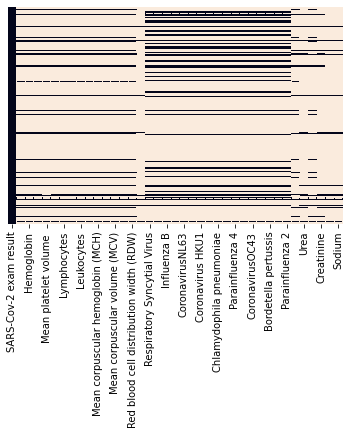

In [ ]:
sns.heatmap(ds.isnull(),yticklabels=False,cbar=False)



**For numerical variables**:

We first check and handle the missing values of the numerical variables.



Review of numerical variables.

In [ ]:
num=["Hematocrit","Hemoglobin","Platelets","Mean platelet volume ","Red blood Cells","Lymphocytes","Mean corpuscular hemoglobin concentration (MCHC)","Leukocytes","Basophils","Mean corpuscular hemoglobin (MCH)","Eosinophils","Mean corpuscular volume (MCV)","Monocytes","Red blood cell distribution width (RDW)","Serum Glucose","Neutrophils","Urea","Proteina C reativa mg/dL","Creatinine","Potassium","Sodium"]
ds[num].head


<bound method NDFrame.head of       Hematocrit  Hemoglobin  Platelets  Mean platelet volume   \
0            NaN         NaN        NaN                    NaN   
1       0.236515   -0.022340  -0.517413               0.010677   
2            NaN         NaN        NaN                    NaN   
3            NaN         NaN        NaN                    NaN   
4            NaN         NaN        NaN                    NaN   
...          ...         ...        ...                    ...   
5639         NaN         NaN        NaN                    NaN   
5640         NaN         NaN        NaN                    NaN   
5641         NaN         NaN        NaN                    NaN   
5642         NaN         NaN        NaN                    NaN   
5643    0.694287    0.541564  -0.906829              -0.325903   

      Red blood Cells  Lymphocytes  \
0                 NaN          NaN   
1            0.102004     0.318366   
2                 NaN          NaN   
3                 NaN    

We can see that almost every numerical variables in the dataset contain missing values. We must handle them by dropping them out with dropna() function.

In [ ]:
ds=ds.dropna(axis=0,subset= num)

In [ ]:
print(ds[num].describe())

       Hematocrit  Hemoglobin   Platelets  Mean platelet volume   \
count  151.000000  151.000000  151.000000             151.000000   
mean     0.008539   -0.009477   -0.087899              -0.080713   
std      1.057257    1.032369    1.164224               0.912235   
min     -3.265437   -3.593731   -2.075077              -2.008802   
25%     -0.530252   -0.648900   -0.699559              -0.662483   
50%      0.076295    0.040316   -0.215930              -0.213711   
75%      0.740064    0.635548    0.299105               0.459449   
max      2.662704    2.671868    9.532034               3.713052   

       Red blood Cells  Lymphocytes  \
count       151.000000   151.000000   
mean          0.002527    -0.058381   
std           1.067680     0.955353   
min          -3.476958    -1.830953   
25%          -0.567950    -0.734971   
50%           0.013852    -0.005738   
75%           0.736697     0.565708   
max           3.645706     2.467685   

       Mean corpuscular hemoglobin 

**For categorical variables:**

Let's do the same with the catagorical variables.


Review of categorical variables.

In [ ]:
desireddata = ["SARS-Cov-2 exam result","Hematocrit","Hemoglobin","Platelets","Mean platelet volume ","Red blood Cells","Lymphocytes","Mean corpuscular hemoglobin concentration (MCHC)","Leukocytes","Basophils","Mean corpuscular hemoglobin (MCH)","Eosinophils","Mean corpuscular volume (MCV)","Monocytes","Red blood cell distribution width (RDW)","Serum Glucose","Respiratory Syncytial Virus","Influenza A","Influenza B","Parainfluenza 1","CoronavirusNL63","Rhinovirus/Enterovirus","Coronavirus HKU1","Parainfluenza 3","Chlamydophila pneumoniae","Adenovirus","Parainfluenza 4","Coronavirus229E","CoronavirusOC43","Inf A H1N1 2009","Bordetella pertussis","Metapneumovirus","Parainfluenza 2","Neutrophils","Urea","Proteina C reativa mg/dL","Creatinine","Potassium","Sodium"]
cat = ["Respiratory Syncytial Virus","Influenza A","Influenza B","Parainfluenza 1","CoronavirusNL63","Rhinovirus/Enterovirus","Coronavirus HKU1","Parainfluenza 3","Chlamydophila pneumoniae","Adenovirus","Parainfluenza 4","Coronavirus229E","CoronavirusOC43","Inf A H1N1 2009","Bordetella pertussis","Metapneumovirus","Parainfluenza 2"]


In [ ]:
ds[cat].isnull().sum()


Respiratory Syncytial Virus    37
Influenza A                    37
Influenza B                    37
Parainfluenza 1                37
CoronavirusNL63                37
Rhinovirus/Enterovirus         37
Coronavirus HKU1               37
Parainfluenza 3                37
Chlamydophila pneumoniae       37
Adenovirus                     37
Parainfluenza 4                37
Coronavirus229E                37
CoronavirusOC43                37
Inf A H1N1 2009                37
Bordetella pertussis           37
Metapneumovirus                37
Parainfluenza 2                37
dtype: int64

We can see that some categorical variables in the dataset which contain missing value. We must handle them by dropping them out with dropna() function.

In [ ]:
ds=ds.dropna(axis=0,subset= cat)

Since all categorical variables that we use are binary, we do not have to be worried about the high cardinality issue and feature engineering.

**Summary**

We have finished handling the missing values and now dataframe "ds" is ready to be analysed.
*  Target variable "**SARS-Cov-2 exam result**" is a binary categorical variable.

*  We have **test results of other Respiratory viruses** which are all binary categorical variables, and they are stored in the list "**cat**"
*  We have **Complete Blood Count(CBC) Parameters** which are all numerical variables, and they are stored in the list "**num**"





In [ ]:
print("Target variable is SARS-Cov-2 exam result ")
print("Categorical variables are",cat)
print("Numerical variables are",num)

Target variable is SARS-Cov-2 exam result 
Categorical variables are ['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B', 'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus', 'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus', 'Parainfluenza 2']
Numerical variables are ['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells', 'Lymphocytes', 'Mean corpuscular hemoglobin concentration\xa0(MCHC)', 'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils', 'Mean corpuscular volume (MCV)', 'Monocytes', 'Red blood cell distribution width (RDW)', 'Serum Glucose', 'Neutrophils', 'Urea', 'Proteina C reativa mg/dL', 'Creatinine', 'Potassium', 'Sodium']


### **Outliers Handling**

For numerical variables, we have to take care of strong influential outliers that exist in the variables. Let's check them out by plotting box plots.

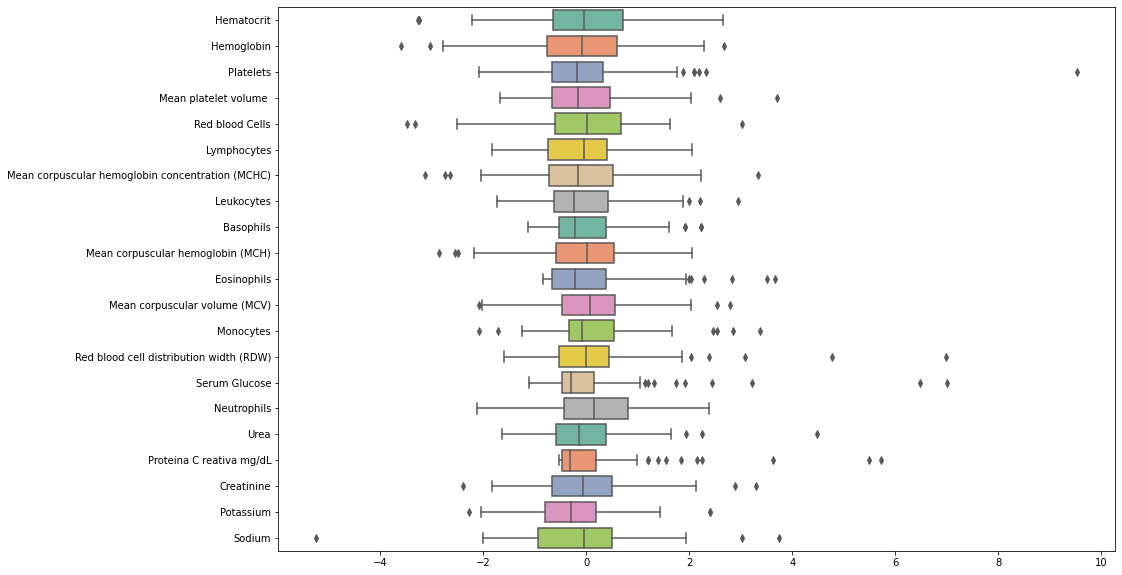

In [ ]:
plt.figure(figsize=(15,10))

ds_2 = ds[num]
ax = sns.boxplot(data=ds_2, orient="h", palette="Set2")


Now, we can find out outliers by using the **Inter quartile range (IQR) method**
to eliminate them by replacing them with the correct median values.

In [ ]:
# detect and remove all outliers for every numerical variable.
for n in num:
  IQR = ds[n].quantile(0.75) - ds[n].quantile(0.25)
  Lower_fence = ds[n].quantile(0.25) - (IQR * 3)
  Upper_fence = ds[n].quantile(0.75) + (IQR * 3)
  median = ds.loc[(Lower_fence < ds[n]) | (ds[n] < Upper_fence), n].median()

  ds[n] = ds[n].mask(ds[n] > Upper_fence, median)
  ds[n] = ds[n].mask(ds[n] < Lower_fence, median)


### **Data Encoding**

For **categorical variables**, we need to encode them.


In [ ]:
ds.replace(("detected","not_detected"),(1,0),inplace = True)
#ds

# **Multivariate Analysis**

By multivariate analysis, we discover patterns and relationships between numerical independent variables in the dataset.

We can use heat map and pair plots to discover the patterns and relationships among independent variables in the dataset.

In [ ]:
correlation = ds[num].corr()


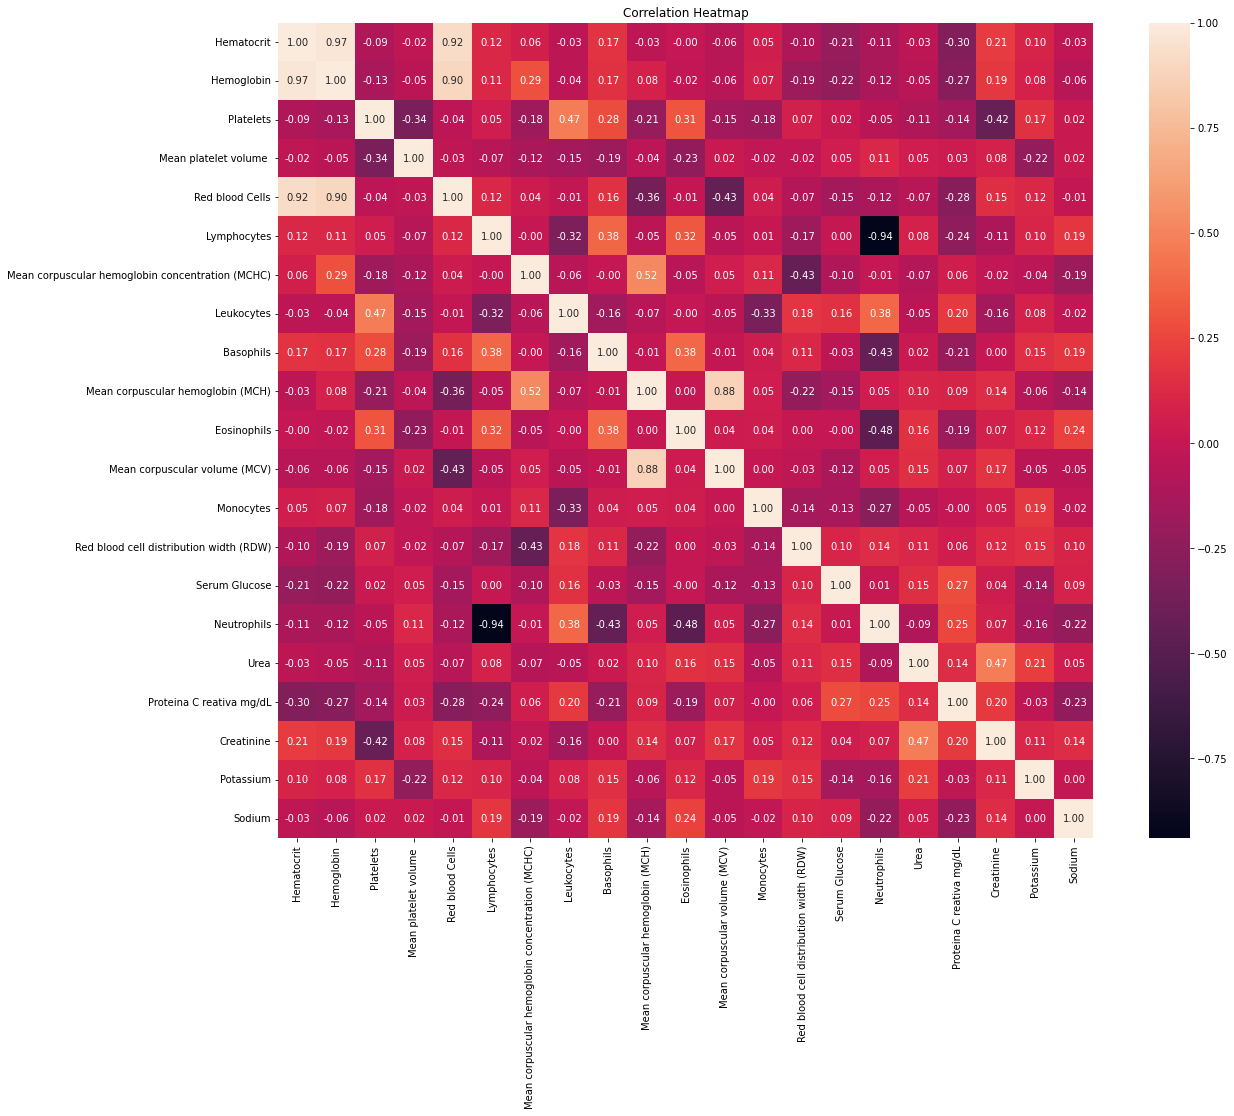

In [ ]:
plt.figure(figsize=(20,15))
plt.title('Correlation Heatmap')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='red')
ax.set_xticklabels(ax.get_xticklabels())
ax.set_yticklabels(ax.get_yticklabels())
plt.show()


**Interpretation:**

From the above correlation heat map, few variables clearly have strong positive correlation with each other. We can clearly notice that "Hematocrit", "Hemoglobin","Red blood cells", "Lymphocytes", "Neutrophils" have some significant correlations with other variables. Now, we try to extract them using **Pair Plots** to discover the relationship between the variables.



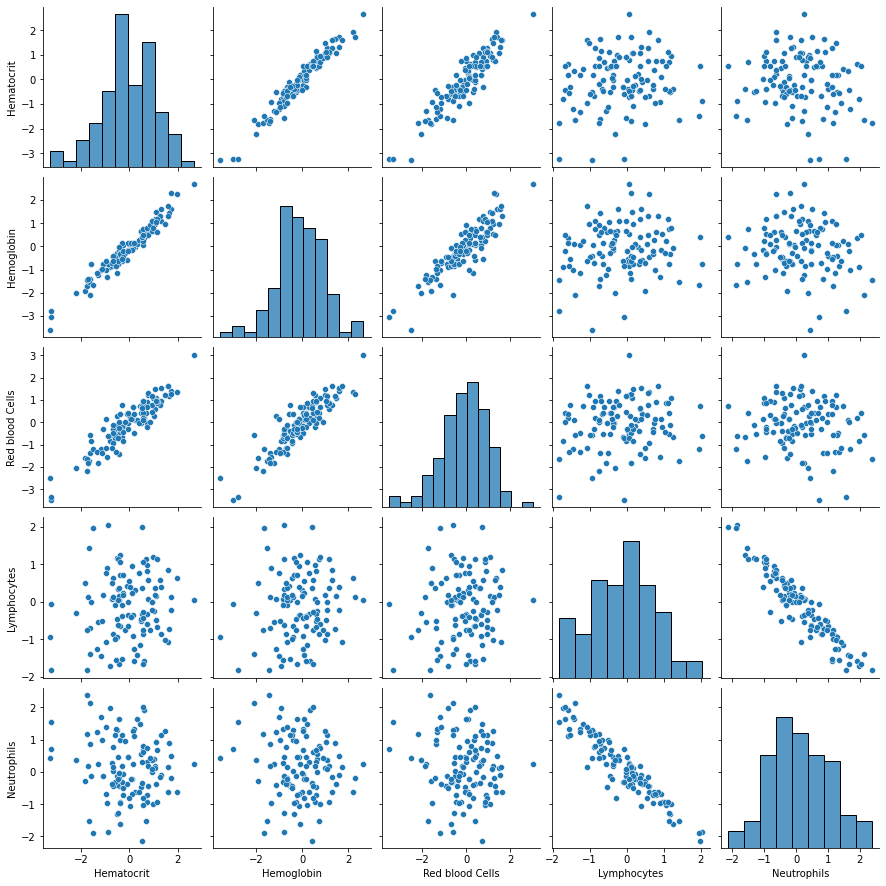

In [ ]:
highlycorr = ["Hematocrit", "Hemoglobin","Red blood Cells", "Lymphocytes", "Neutrophils"]

sns.pairplot(ds[highlycorr], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

**Interpretation:**

Few pairs of variables have very significant collinearity with each other. They are:

*   Hemoglobin & Red blood Cells
*   Hemoglobin & Hemotocrit
*   Hemotocrit & Red blood Cells
*   Lymphocytes & Neutrophils





To avoid the existence of multicollinearity among our independent variables, we decide to drop one of the features with correlation > 0.9 with each other. Here, we can drop "Hemoglobin", "Red blood Cells" and "Lymphocytes", leaving "Hematocrit" and "Neutrophils".



In [ ]:
todrop = ["Hemoglobin","Red blood Cells", "Lymphocytes"]
ds.drop(todrop, axis=1)


,SARS-Cov-2 exam result,Hematocrit,Platelets,Mean platelet volume,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),...,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium
1,0,0.236515,-0.517413,0.010677,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,...,0,0,0,0,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512
8,0,-1.571682,1.429667,-1.672222,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,...,0,0,0,0,-0.127395,-0.067309,-0.286986,-1.838623,0.930020,0.503132
30,0,-0.679027,0.952319,-0.886869,-0.253742,-0.286623,-0.223767,-0.710443,-0.540532,-0.675050,...,0,0,0,0,0.782232,-0.439476,0.545572,1.021638,0.435697,-1.653147
50,0,1.014726,-0.203368,0.459449,-0.950790,-0.083479,-0.223767,0.544077,0.133698,1.167670,...,0,0,0,0,0.388879,0.825892,-0.461843,2.124389,-0.800110,0.862512
55,0,0.625621,-0.127997,0.796029,-0.851210,0.556563,0.081693,0.230447,-0.624811,0.686961,...,1,0,0,0,1.921316,-0.737209,0.611144,-0.494645,-1.541595,0.862512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5566,1,1.106281,-0.253615,-0.438097,0.044991,0.155841,-0.529226,0.073631,-0.793368,0.046015,...,0,0,0,0,0.913350,0.304858,0.227650,1.710857,-1.047272,-0.575008
5581,0,-2.212562,0.826701,-0.325903,0.244149,0.609436,0.387152,0.230447,0.344395,0.106103,...,0,0,0,0,0.356101,-0.662776,0.648897,-0.839255,-1.541595,-0.215628
5602,0,0.190738,-0.102873,0.908221,-0.054585,-0.328365,-0.834685,-0.449085,0.892207,-0.474754,...,0,0,0,0,1.118221,0.379292,-0.319771,0.470262,0.188535,-0.035938
5614,0,-0.289922,0.663397,-0.774677,-1.050367,1.569499,0.081693,-2.174047,-0.540532,-1.976971,...,0,0,0,0,1.134611,-0.067309,-0.319771,0.504723,-0.552949,-0.215628


Now, we have our data ready to be tested and trained.

# **Logistic Regression Implementation**

## **Train Test Split**


After assigning X and y, we split X and Y into training and testing cases. We keep 20% of the original dataset as the test dataset.


In [ ]:
X = ds.drop(["SARS-Cov-2 exam result"],axis=1)

y = ds['SARS-Cov-2 exam result']

In [ ]:
ds.replace(("detected","not_detected"),(1,0),inplace = True)


In [ ]:
ds_train, ds_test = train_test_split(ds, test_size=0.2, random_state = 1000, stratify=ds['SARS-Cov-2 exam result'])
print(ds_train['SARS-Cov-2 exam result'].value_counts(normalize=True))
print()
print(ds_test['SARS-Cov-2 exam result'].value_counts(normalize=True))

0    0.802198
1    0.197802
Name: SARS-Cov-2 exam result, dtype: float64

0    0.826087
1    0.173913
Name: SARS-Cov-2 exam result, dtype: float64


## **Standardization of numerical variables**








Since we have more that 1 predictors in our model, we decide to perform standardization to yield comparable regression coefficients, and our goal is to compare the effect of each on the outcome. After standardization, the predictor, Z, that has the largest coefficient is the one that has the most significant impact on our target outcome.

After creating a class of StandardScaler, we first fit the mean and standard deviation for scaling using ds_train’s numerical variables. Then we need to perform standardization on the numerical variables of our dataframe into scaled nnumerical variables. Notice we also have to assign the target variable to y. Eventually, we can have our new training dataset to output out training feature and target, assign them into X and y.

In [ ]:
scaler = StandardScaler()
scaler.fit(ds_train[num])

def scaled(ds, num ,cat, scaler):
    X_numscaled = scaler.transform(ds[num])
    X_cat = ds[cat].to_numpy()
    X = np.hstack((X_cat, X_numscaled))
    y = ds['SARS-Cov-2 exam result']
    return X, y

X, y = scaled(ds_train, num, cat, scaler)
print(X,y)


[[ 0.          0.          0.         ...  0.24958975 -0.4896308
  -0.43748228]
 [ 0.          0.          0.         ... -0.81387963  0.34061275
   0.28307675]
 [ 0.          0.          0.         ...  2.33854767 -0.4896308
   1.0036358 ]
 ...
 [ 0.          0.          0.         ... -0.8898419   0.06386509
   0.28307675]
 [ 0.          0.          0.         ... -0.01627759 -0.21288319
  -0.43748228]
 [ 0.          0.          0.         ...  0.6673811  -0.4896308
   1.36391537]] 4535    1
126     0
50      0
4437    0
5009    1
       ..
115     0
2731    0
560     0
4978    1
890     0
Name: SARS-Cov-2 exam result, Length: 91, dtype: int64


## **Model Fitting**

Now, we can fit our model using the training dataset.

In [ ]:
clf = LogisticRegression()
clf.fit(X, y)


LogisticRegression()

## **Model Evaluation**


Let's look at some of the useful model evaluation metrics to estimate the generalization accuracy of our model on the future data.

**Precision-recall curve.**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


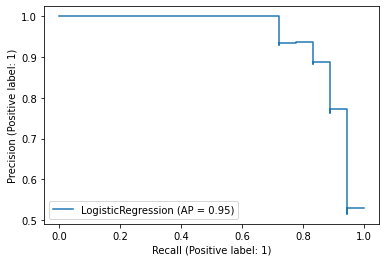

In [ ]:
Xtest, ytest = scaled(ds_train, num, cat, scaler)
test_prob = clf.predict_proba(Xtest)[:, 1]
test_pred = clf.predict(Xtest)

plot_precision_recall_curve(clf, Xtest, ytest)

The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

**ROC Curve**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


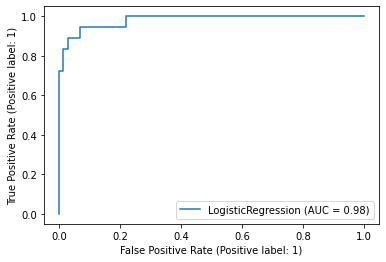

In [ ]:
plot_roc_curve(clf, Xtest, ytest)

**Log Loss**

In [ ]:
print('Log loss = {:.5f}'.format(log_loss(ytest, test_prob)))

Log loss = 0.17158


**AUC Score**

In [ ]:
print('AUC = {:.5f}'.format(roc_auc_score(ytest, test_prob)))

AUC = 0.98097


**Accuracy Score**

In [ ]:
print('Accuracy = {:.5f}'.format(accuracy_score(ytest, test_pred)))

Accuracy = 0.95604


**Precision Score**

In [ ]:
print('Precision = {:.5f}'.format(precision_score(ytest, test_pred)))

Precision = 0.93750


**Recall Score**

In [ ]:
print('Recall = {:.5f}'.format(recall_score(ytest, test_pred)))

Recall = 0.83333


**F1 Score**

In [ ]:
print('F1 score = {:.5f}'.format(f1_score(ytest, test_pred)))

F1 score = 0.88235


**Classification Report**

In [ ]:
print(classification_report(ytest, test_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        73
           1       0.94      0.83      0.88        18

    accuracy                           0.96        91
   macro avg       0.95      0.91      0.93        91
weighted avg       0.96      0.96      0.96        91



**Confusion Matrix**


A heatmap based on a threshold of 0.5 for binary classification is plotted for visualization.

Confusion Matrix


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


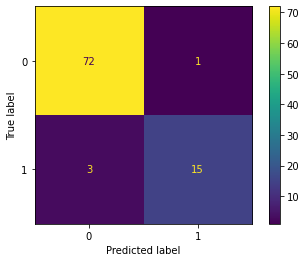

In [ ]:
print('Confusion Matrix')
plot_confusion_matrix(clf, Xtest, ytest)

**Summary:**

Our model has already met the targets that were set, which were to achieve **at least 70% of the F1 score and 80% accuracy score.**

# **Result Interpretation & Findings**



After checking the evaluation metrics, we can now interpret the results of our model and see if we could extract some of the useful information from both the numerical and categorical variables of our model. Before that, we must understand the concept of a logistic regression model.


**The logistic regression model**

The "logit" model solves these problems:

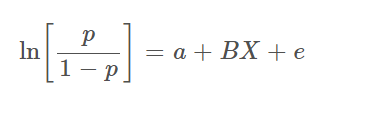


where:

ln is the natural logarithm, logexp, where exp=2.71828…
p is the probability that the event Y occurs, p(Y=1),
**p/(1-p)** is the "odds ratio",
**ln[p/(1-p)]** is the log odds ratio, or "logit"
all other components of the model are the same.
The logistic regression model is simply a non-linear transformation of the linear regression. The "logistic" distribution is an S-shaped distribution function which is similar to the standard-normal distribution (which results in a probit regression model) but easier to work with in most applications (the probabilities are easier to calculate). The logit distribution constrains the estimated probabilities to lie between 0 and 1.

For instance, the estimated probability is:

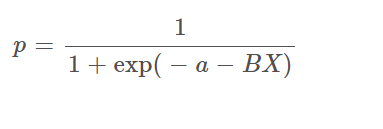




This model ultimately gives a sigmoid function.

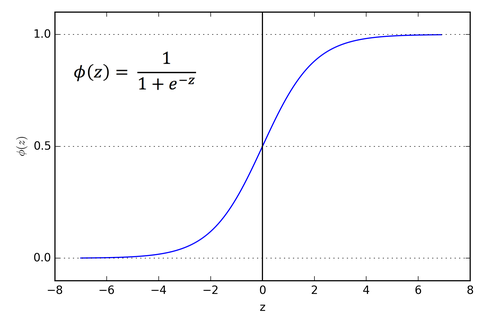

After grasping the idea of how the logistic regression model works, we can now interpret the coefficient, **β** of our model.



In [ ]:
coefficients = np.hstack((clf.intercept_, clf.coef_[0]))
df= {'variable': ['intercept'] + cat + num, 'coefficient': coefficients}
pd.DataFrame(data=df)

,variable,coefficient
0,intercept,-2.910040
1,Respiratory Syncytial Virus,-0.152351
2,Influenza A,-0.018557
3,Influenza B,-0.674223
4,Parainfluenza 1,0.000000
5,CoronavirusNL63,-0.184827
6,Rhinovirus/Enterovirus,-0.583133
7,Coronavirus HKU1,0.000000
8,Parainfluenza 3,-0.115506
9,Chlamydophila pneumoniae,0.000000


The logistic regression coefficient **β** associated with a predictor X is the expected change in log odds of having the outcome per unit change in X. So increasing the predictor by 1 unit (or going from 1 level to the next) multiplies the odds of having the outcome by **eβ**.

### **Categorical Variables (Respiratory Viruses):**


We first interpret coefficients of "Respiratory Viruses" which are all binary categorical data in our dataset.

In [ ]:
df1={"Respiratory Viruses" : [], "Coefficient" : []}

for n in range(len(df["variable"])):  # we try to create a new df1 with all categorical variables with their corresponding coefficient and try to visualize them with a bar chart
  if df["variable"][n] in cat:
    df1["Respiratory Viruses"].append(df["variable"][n])
    df1["Coefficient"].append(df["coefficient"][n])
df1 = pd.DataFrame(data=df1)
df1

,Respiratory Viruses,Coefficient
0,Respiratory Syncytial Virus,-0.152351
1,Influenza A,-0.018557
2,Influenza B,-0.674223
3,Parainfluenza 1,0.000000
4,CoronavirusNL63,-0.184827
5,Rhinovirus/Enterovirus,-0.583133
6,Coronavirus HKU1,0.000000
7,Parainfluenza 3,-0.115506
8,Chlamydophila pneumoniae,0.000000
9,Adenovirus,0.000000


We can visualize them with a bar chart.

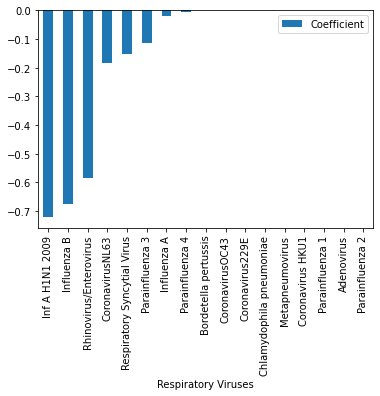

In [ ]:
df1_sorted = df1.sort_values('Coefficient')
df1_sorted.plot.bar(x='Respiratory Viruses', y='Coefficient')


By logistic regression equation, taking "Respiratory Syncytial Virus" as an example, we can interpret that holding all the other variables at fixed values,
**eβ** = e-0.152351 = 0.86 is the odds ratio that associates Respiratory Syncytial Virus to the risk of SARS-Covid-19. It implies that a Respiratory Syncytial Virus Carrier has a 0.86 times the odds of a non-carrier of being detected positive for SARS-Cov-2 exam test, where odds = **P/(1-P)**. In other words, (Carrying) Respiratory Syncytial Virus is associated with a 14% reduction in the relative risk of being tested positive for SARS-Cov-2 test.

**Findings:**


1.   “**Influenza B**”, "**Rhinovirus/Enterovirus**", "**Inf A H1N1 2009**" are the three most significant independent variables.

2.   Variables with 0 coefficient have little or no effect with our target variable.

3.   We do not have any categorical variable with a positive coefficient.

In [ ]:
sig = ["Influenza B", "Rhinovirus/Enterovirus", "Inf A H1N1 2009"]

for n in sig:
  cof = df["coefficient"][(df["variable"].index(n))]
  odd = exp(cof)
  print("a {} carrier has {:.2f} times the odds of a non-carrier of being detected positive for SARS-Cov-2 exam test based on the model and data set.".format(n,odd))

a Influenza B carrier has 0.51 times the odds of a non-carrier of being detected positive for SARS-Cov-2 exam test based on the model and data set.
a Rhinovirus/Enterovirus carrier has 0.56 times the odds of a non-carrier of being detected positive for SARS-Cov-2 exam test based on the model and data set.
a Inf A H1N1 2009 carrier has 0.49 times the odds of a non-carrier of being detected positive for SARS-Cov-2 exam test based on the model and data set.


### **Numerical Variables(Complete Blood Count (CBC) Parameters)**

For CBC Parameters:

In [ ]:
df2={"Complete Blood Count(CBC) Parameters" : [], "Coefficient" : []}

for n in range(len(df["variable"])):  # we try to create a new df2 with all numerical variables with their corresponding coefficient and try to visualize them with a bar chart
  if df["variable"][n] in num:
    df2["Complete Blood Count(CBC) Parameters"].append(df["variable"][n])
    df2["Coefficient"].append(df["coefficient"][n])
df2 = pd.DataFrame(data=df2)
df2

,Complete Blood Count(CBC) Parameters,Coefficient
0,Hematocrit,0.371984
1,Hemoglobin,0.300197
2,Platelets,-0.021256
3,Mean platelet volume,-0.123064
4,Red blood Cells,0.430981
5,Lymphocytes,0.150259
6,Mean corpuscular hemoglobin concentration (MCHC),-0.125904
7,Leukocytes,-1.400785
8,Basophils,-0.058657
9,Mean corpuscular hemoglobin (MCH),-0.341284


We can visualize them with a bar chart.

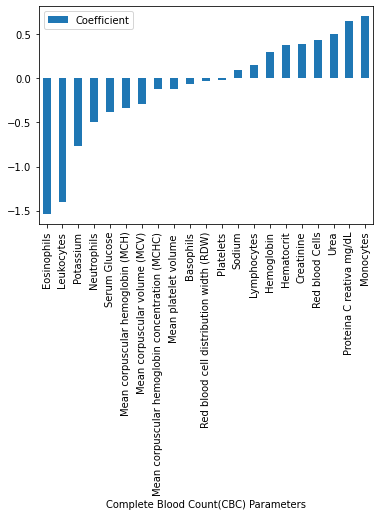

In [ ]:
df2_sorted = df2.sort_values('Coefficient')
df2_sorted.plot.bar(x='Complete Blood Count(CBC) Parameters', y='Coefficient')

**Findings:**



*   **"Monocytes", "Proteina C reativa mg/dL" and "Urea"** have the most positive coefficients, β. They have the highest positive correlation impact on our target variables.

*   **"Leukocytes", "Eosinophils" and "Potassium"** have the most negative coefficients, β. They have the highest negative correlation impact on our target variables.

*   **"Sodium"**, **"Platelets"** and "**Red blood cell distribution width (ROW)**" have the smallest coefficients among all variables.




Remember we have all our numerical variables **standardized** by StandardScaler, we need to interpret the coefficients in terms of **standard deviations.**

Taking "Hematocrit" as an example, an increase in 1 standard deviation in Hematocrit ratio is associated with 45%(eβ = 1.45) increase in the odds of being detected positive for SARS-Cov-2 test.


The findings can be interpreted in this way:



*   an increase in 1 standard deviation in **Monocytes** ratio, is associated with **102%** **increase** in the odds of being detected positive for SARS-Cov-2 test.
*  an increase in 1 standard deviation in **Proteina C reativa mg/dL**, is associated with **93%** **increase** in the odds of being detected positive for SARS-Cov-2 test.
*   an increase in 1 standard deviation in **Urea**, is associated with **65%** **increase** in the odds of being detected positive for SARS-Cov-2 test.



*   an increase in 1 standard deviation in **Eosinophils**, is associated with **78%** **decrease** in the odds of being detected positive for SARS-Cov-2 test.
*   an increase in 1 standard deviation in **Leukocytes**, is associated with **75%** **decrease** in the odds of being detected positive for SARS-Cov-2 test.
*   an increase in 1 standard deviation in **Potassium**, is associated with **54%** **decrease** in the odds of being detected positive for SARS-Cov-2 test.



